In [33]:
# Importing all the necessary libraries and packages. For full details of the library used,
# please refer to the reqirements.txt file.

import pandas as pd
import numpy as np
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist
import re
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import PassiveAggressiveClassifier
%pip install wordcloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\patie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\patie\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


## I. Introduction

### 1. Domain-specific area

The year 2020 has been very challenging for everyone. Together with the pandemic a spike in fake news, rumours and unfounded information around Covid-19 has risen on the Web and on social media, creating doubts, panic and fear among many individuals.
In particular, the rise of the so called “anti-vax” movements all around the world has created additional challenges to governments for the implementation of the vaccination campaign against the Covid-19 virus.
Despite the scientific-proven and reliable information on the security and efficacy of the life-saving Covid-19 vaccination, shared by the World Health Organization and other reliable bodies, some of these anti vaccination movements are using fake or unfounded information to boost people’s fear and anger against the vaccine and against governments rules to tackle the virus.
Due to the fake news, many countries have experienced violent and disruptive manifestations with some individuals even physically attempting to prevent others receiving the vaccination.
Tackling the fake information around Covid-19 is now, more than ever, very important because these rumours can be dangerous and, as experienced by many countries, can actually cause significant harm to people and disruption to every day’s life.
To tackle fake information, I will be creating text classifiers for fake news detection with the aim of trying and detect if a piece of Covid-19 related information is true or false.



### 2. Objectives

The objectives of this project are to create a machine learning model which is able to detect whether any Covid-19 related piece of information is fake or real; this project wants to contribute in creating a tool to spot and filter out fake and misleading news while highlighting real, reliable news, taken from official sources and organizations so that people can trust the government campaigns against the virus.
Due to the rise in fake news, there is an urgent need of clarity of information: this project will give people a tool they can use to confirm scientific proven information on Covid-19. 
The project will help achieve this goal of clarity and reliability, with the implementation of text classifiers to spot fake versus real information.
The results may help people to be more self-aware and critical when reading online or social media articles about the pandemic or the vaccination.
It may also help people to choose reliable sources only, when making personal decisions on getting vaccinated: looking for true news from reliable sources and organization can help people trust the vaccination campaign and its efficacy; it may convince people on getting the lifesaving vaccine to protect themselves and others, all while feeling more confident and comfortable in their decision.


### 3. Dataset

The dataset chosen for this project is the “corona_fake.csv” dataset which comprises of 1164 rows and 4 columns which are: Title, Text, Source and Label.
The dataset is made up of a series of Coronavirus-related articles and piece of information in English language. The title column shows the title of the article, the column text reports the body of the article, column source shows the source from where the article has been taken from (this can be a website or a social media page) and finally column label explains if the article is either Fake or True.
Within these 1164 rows, the lines with false news are 575, while the lines with true news are 584.
As shown in the code below, of the news labelled as fake news, some are labelled as “Fake” (345 lines) and others as “fake” (230 lines).
To unify the Fake news and create more homogeneity as we will be implementing binary classifiers, these 2 labels have been unified into a unique “FAKE” label.

The dataset is a Csv file, 4.29 MG big, acquired from Githubusercontent.com. (2020), more specifically, from the following website: https://raw.githubusercontent.com/susanli2016/NLP-with-Python/master/data/corona_fake.csv (please refer to the reference section for the full reference).
From the provided link, I have saved the dataset as a Comma Separated Values file and then uploaded it into the Notebook using pd.read_csv as a data frame, as shown in the code below.


In [34]:
# Uploading the dataset 'corona_fake.csv' into a data frame, let's have a look:

df = pd.read_csv(r'C:\Users\patie\OneDrive\Desktop\UNI STUFF\NLP\Student Number 200546665\corona_fake.csv')
df.head()
df


,title,text,source,label
0,Due to the recent outbreak for the Coronavirus...,"You just need to add water, and the drugs and ...",coronavirusmedicalkit.com,Fake
1,NaN,Hydroxychloroquine has been shown to have a 10...,RudyGiuliani,Fake
2,NaN,Fact: Hydroxychloroquine has been shown to hav...,CharlieKirk,Fake
3,NaN,The Corona virus is a man made virus created i...,JoanneWrightForCongress,Fake
4,NaN,Doesn’t @BillGates finance research at the Wuh...,JoanneWrightForCongress,Fake
...,...,...,...,...
1159,Could the Power of the Sun Slow the Coronavirus?,A study suggests that ultraviolet rays could s...,https://www.nytimes.com/,TRUE
1160,Key evidence for coronavirus spread is flawed ...,"Last week, a medical journal reported that a b...",https://www.nytimes.com/,TRUE
1161,Summer Heat May Not Diminish Coronavirus Strength,"A new report, sent to the White House science ...",https://www.nytimes.com/,TRUE
1162,How Long Will a Vaccine Really Take?,A vaccine would be the ultimate weapon against...,https://www.nytimes.com/,TRUE


In [35]:
# Let's check how many lines are TRUE and how many are FAKE data:

df.label.value_counts()


label
TRUE    584
Fake    345
fake    230
Name: count, dtype: int64

In [36]:
# Because I will be creating a binary classifier, I want to unify the FAKE labels,
# by doing this:

df.loc[df['label'] == 'fake', 'label'] = 'FAKE'
df.loc[df['label'] == 'Fake', 'label'] = 'FAKE'

# Let's check how many lines are TRUE and how many are FAKE now:

df.label.value_counts()


label
TRUE    584
FAKE    575
Name: count, dtype: int64

### 4. Evaluation methodology

This project is a machine learning binary classification problem: I’ll classify the news between two mutually exclusive classes, Fake or Real.
The models will be trained to classify between these two labels; to assess the outputs of my investigations I will use accuracy, recall and confusion matrix as evaluation metrics.
These will be applied to the classifiers, after implementation, using the sklearn.metrics package and the accuracy_score, confusion_matrix, classification_report metrics.
The classification_report metric will show the recall but also the precision and f1-score. Our focus will be on recall mainly because it tells us how many true positives were actually found by our model, which means: out of all the articles that are true, how many articles are correctly identified?
I will also be looking at the accuracy (which is the ratio of number of correct predictions to the total number of predictions) because it is a good metric for evaluating balanced data: our dataset, with 50,39% real news and 49,61% false news, is indeed quite balanced.
Accuracy and recall will be calculated for both train and test data, for most models.

Furthermore, I will use a confusion matrix to show more insights into my model as it is also a common way of presenting true positive, true negative, false positive and false negative predictions.
The values will be presented in the form of a matrix where the Y-axis shows the true labels while the X-axis shows the predicted labels.

Lastly, in order to additionally evaluate the models, I will also use nested cross-validation which will perform multiple evaluations on different test sets to then combine the scores from those evaluations.
Applying nested cross-validation will allow to examine how widely the performance varies across different training sets: if scores are similar for all N training sets, then I can be fairly confident that the score is accurate. On the other hand, if scores vary greatly across the N training sets, then I should probably be dubious about the accuracy of the evaluation score.
The procedure for nested cross-validation will see the original dataset divided into N subsets called folds. For each of these folds, the model is trained using all of the data except the data in that fold; then, the model is tested on the fold. 
Even though the individual folds might be too small to give accurate evaluation scores on their own, the combined evaluation score is based on a large amount of data, and is therefore much more reliable.
Another advantage of nested cross-validation is that it can help with model overfit which occurs when a machine learning algorithm captures the noise of the data and it fits the data too well.


## II. Implementation

### 5. Preprocessing

The uploaded dataset is firstly analysed through some data exploration and data cleaning steps.
There appear to be some empty cells with missing values, which I am replacing with an empty string, as shown in the code below, with df.fillna(' ').
The column of more interest is the label column, those 5 empty cells are dropped from the initial dataset in order to obtain a cleaner and more comprehensive dataset (with only false or true articles) which is then saved in the New_df dataframe: as this is a binary classification problem, it is not of use having missing labels as the models won’t be able to classify the relative text.
To pre-process the data and make it algorithm ready, I will be removing from columns Text, Title and source all of the unnecessary special characters, using regex library. 
In more detail, any html tag and URLs will be removed. Additionally, to add homogeneity to these columns and avoid duplication of the same words, all the letters will be in lowered characters.
I will then proceed with removing all of the stop words from these 3 columns, using an implemented cleaning function.
Stop words are high frequency words with little lexical content, when using our machine learning models later on, these can add noise to the results, hence why I am eliminating them.
After getting all of the English stop words list, the cleaning function will basically tokenize the text (done using word_tokenize from the nltk library), removing any stop words from it and then return each cleaned tokenized sentence, joined together to form the full text again (as shown in the printed results for each column).

Tokenizing the text will be needed for exploratory data analysis, where I will be calculating the words frequency distribution and implementing two word clouds to include only the fake and the new bag of words.
To proceed with the exploratory data analysis, I’ll first concatenate the 3, special characters and stop word cleaned columns, title, text and source and name the newly formed column: title_text_source and, for simplicity, rename it as txt.
To calculate the frequency distribution of txt, I first transform the dataset into string types with txt.to_string(). The dataset counts 67221 items. I then split the text in individual strings using blank spaces “ “ and apply FreqDist() from the nltk library.
As shown in the outcome, the punctuation is preventing the most frequent words to show. So I'll remove the punctuation using again regex library.
After removing the punctuation as well, to further explore this bag of words through the use of simple visualizations, a Frequency distribution is performed.
The 10 most common words appear to be in order: coronavirus, covid19, new, virus, china, us, gated, bill and people as shown in the Frequency Distribution bar graph with coronavirus being them most frequent word with 413 counts.
The last step of the data analysis will be implementing two word clouds to include only the fake and the new bag of words.
To create the fake news word cloud, I first filter column label of the dataframe with only the FAKE news and place them into a separate dataframe, together with the title_text_source column (which we remember from above, is special characters and stop word cleaned but not punctuation cleaned).
I then create a text list of all the words in this column, setting it as a string type so that I can perform WordCloud() on it.
The mask, which is a .jpg picture used for the creation of the shape “Fake”, is uploaded and used for the implementation of the word cloud, as shown in the script below.
Exactly the same steps are then applied to create the “Real” word cloud.

The last and final step of this pre-processing phase is to transform the words in the column title_text_source (special characters and stop word cleaned) into TFIDF Vectorized items so I can start applying the text classifiers.
Machine learning algorithms are not able to work with raw text directly, the text must be converted into numbers, specifically, into vectors of numbers.
Scikit-learn’s TfidfVectorizer() from the sklearn.feature_extraction.text library is therefore used to convert the collection of text in title_text_source into a vector of term/token counts.
In more detail, I switch the lowercase off as we have already converted the text to lowercase earlier, I switch use_idf on to enable inverse-document-frequency reweighting, with norm, each output row will have unit norm and smooth_idf is switched on to avoid zero divisions.
While simple count vectorizers just count the word frequencies, in the TFIDF Vectorizer the value increases proportionally to the count, but is offset by the frequency of the word in the corpus (some words basically appear more frequently): this is the inverse document frequency (IDF) effect. 
While fit_transform learns the vocabulary dictionary and returns a vector-term matrix, the output is then stored into item X.
I then define the y variable, in which I will store the target (or labels).
Before applying the models, I am going to choose a subset of the data to split in between train and test: 30% of the entire dataset is going to be used to test the overall performance of the model. 
The split can be easily done using the train_test_split function from Sklearn package which output will be 4 new variables X_train, X_test, y_train and y_test, ready to be trained and tested in the models.


In [37]:
# Let's do some quick exploration data analysis and data cleaning, where necessary.

# Are there missing values in the whole dataset?

df.isnull()

# It appears so...


,title,text,source,label
0,False,False,False,False
1,True,False,False,False
2,True,False,False,False
3,True,False,False,False
4,True,False,False,False
...,...,...,...,...
1159,False,False,False,False
1160,False,False,False,False
1161,False,False,False,False
1162,False,False,False,False


In [38]:
# More specifically, are there missing values in each of the columns?

df.isnull().any()

# Yes

title     True
text      True
source    True
label     True
dtype: bool

In [39]:
# Counting the missing values per column:

df.isnull().sum()



title     82
text      10
source    20
label      5
dtype: int64

In [40]:
# Cleaning the dataset by getting rid of all empty cells by replacing them with
# an empty string

df = df.fillna('')
df.head()

,title,text,source,label
0,Due to the recent outbreak for the Coronavirus...,"You just need to add water, and the drugs and ...",coronavirusmedicalkit.com,FAKE
1,,Hydroxychloroquine has been shown to have a 10...,RudyGiuliani,FAKE
2,,Fact: Hydroxychloroquine has been shown to hav...,CharlieKirk,FAKE
3,,The Corona virus is a man made virus created i...,JoanneWrightForCongress,FAKE
4,,Doesn’t @BillGates finance research at the Wuh...,JoanneWrightForCongress,FAKE


In [41]:
# Now, in the column label I am dropping the 5 empty cells - I have found initially- 
# and creating a new dataframe called New_df:

New_df = df[df.label != '']

In [42]:
# Let's double check the label column and review this new df:

print(New_df.label.value_counts())
New_df.head()

# It looks cleaner and complete now!

label
TRUE    584
FAKE    575
Name: count, dtype: int64


,title,text,source,label
0,Due to the recent outbreak for the Coronavirus...,"You just need to add water, and the drugs and ...",coronavirusmedicalkit.com,FAKE
1,,Hydroxychloroquine has been shown to have a 10...,RudyGiuliani,FAKE
2,,Fact: Hydroxychloroquine has been shown to hav...,CharlieKirk,FAKE
3,,The Corona virus is a man made virus created i...,JoanneWrightForCongress,FAKE
4,,Doesn’t @BillGates finance research at the Wuh...,JoanneWrightForCongress,FAKE


In [43]:
# Before proceeding, as I will be modifying the new dataframe directly, I am prevent 
# the "SettingWithCopyWarning" alarm message from appearing, by using this:

pd.options.mode.chained_assignment = None

In [44]:
# Now, for the pre-processing, I am removing unecessary special characters with 
# regex, from column text. In specific:

# Removing html tags:

New_df['text'] = New_df.text.replace(r'<[^>]*>', '', regex=True)

# Removing URLs:

New_df['text'] = New_df.text.replace('https?://[A-Za-z0-9]','', regex=True)

# Adding homogenity by lowering all the letters:

New_df['text'] = New_df.text.str.lower()

# I'll apply the same steps above, also to columns 'title' and 'source':

New_df['title'] = New_df.title.replace(r'<[^>]*>', '', regex=True)
New_df['title'] = New_df.title.replace('https?://[A-Za-z0-9]','', regex=True)
New_df['title'] = New_df.title.str.lower()

    
New_df['source'] = New_df.source.replace(r'<[^>]*>', '', regex=True)
New_df['source'] = New_df.source.replace('https?://[A-Za-z0-9]','', regex=True)
New_df['source'] = New_df.source.str.lower()


In [ ]:

# Manually define common English stopwords
stop_words = set([
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
    'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his',
    'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself',
    'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which',
    'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are',
    'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having',
    'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if',
    'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for',
    'with', 'about', 'against', 'between', 'into', 'through', 'during',
    'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down',
    'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then',
    'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any',
    'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no',
    'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very',
    's', 't', 'can', 'will', 'just', 'don', 'should', 'now'
])

# Function to clean text
def Cleaning_function(text):
    if pd.isnull(text):
        return ""
    # Lowercase and remove non-alphabetical characters
    text = re.sub(r'[^a-zA-Z\s]', '', str(text)).lower()
    # Split into words
    words = text.split()
    # Remove stopwords
    cleaned_words = [word for word in words if word not in stop_words]
    # Join back into a string
    return ' '.join(cleaned_words)

# Apply function
New_df['text'] = New_df['text'].apply(Cleaning_function)
New_df['title'] = New_df['title'].apply(Cleaning_function)
New_df['source'] = New_df['source'].apply(Cleaning_function)

# See results
print(New_df[['text', 'title', 'source']])


                                                   text  \
0     need add water drugs vaccines ready administer...   
1     hydroxychloroquine shown effective rate treati...   
2     fact hydroxychloroquine shown effective rate t...   
3     corona virus man made virus created wuhan labo...   
4     doesnt billgates finance research wuhan lab co...   
...                                                 ...   
1159  study suggests ultraviolet rays could slow vir...   
1160  last week medical journal reported business tr...   
1161  new report sent white house science adviser sa...   
1162  vaccine would ultimate weapon coronavirus best...   
1163  developing delivering coronavirus vaccines tes...   

                                                  title  \
0     due recent outbreak coronavirus covid world he...   
1                                                         
2                                                         
3                                                      

In [47]:
# I am curious to do some more exploration data analysis here.

# To proceed with the next steps, I first concatenate my 3 columns:title,text and source

New_df['title_text_source'] = New_df['title'] + ' ' + New_df['text'] + ' ' + New_df['source']
New_df.head()

,title,text,source,label,title_text_source
0,due recent outbreak coronavirus covid world he...,need add water drugs vaccines ready administer...,coronavirusmedicalkitcom,FAKE,due recent outbreak coronavirus covid world he...
1,,hydroxychloroquine shown effective rate treati...,rudygiuliani,FAKE,hydroxychloroquine shown effective rate treat...
2,,fact hydroxychloroquine shown effective rate t...,charliekirk,FAKE,fact hydroxychloroquine shown effective rate ...
3,,corona virus man made virus created wuhan labo...,joannewrightforcongress,FAKE,corona virus man made virus created wuhan lab...
4,,doesnt billgates finance research wuhan lab co...,joannewrightforcongress,FAKE,doesnt billgates finance research wuhan lab c...


In [48]:
# For semplicity, I'll rename this newly concatenated column as txt:

txt = (New_df['title_text_source'])
txt



0       due recent outbreak coronavirus covid world he...
1        hydroxychloroquine shown effective rate treat...
2        fact hydroxychloroquine shown effective rate ...
3        corona virus man made virus created wuhan lab...
4        doesnt billgates finance research wuhan lab c...
                              ...                        
1159    could power sun slow coronavirus study suggest...
1160    key evidence coronavirus spread flawed public ...
1161    summer heat may diminish coronavirus strength ...
1162    long vaccine really take vaccine would ultimat...
1163    funding covid response could best investment b...
Name: title_text_source, Length: 1159, dtype: object

In [49]:
# I am now trasforming my txt into strings so I can perform Frequency distribution:

txt_string = txt.to_string()

# Counting the vocabularies in my txt in string format:

print(len(txt_string))
# 67221 items counted.



67221


In [50]:
# Calculating the Frequency distribution of my text in string:

text = txt_string
 
text_list = text.split(" ")
 
freqDist = FreqDist(text_list)
words = list(freqDist.keys())
 
freqDist

FreqDist({'': 4689, 'coronavirus': 430, 'covid': 279, 'new': 74, 'virus': 72, 'people': 56, 'gates': 55, 'us': 52, 'bill': 50, 'g': 49, ...})

In [51]:
# The punctuation is preventing the most frequent words to show. 
# So I'll remove the punctuation now:

txt_string_nopunct = re.sub(r'[^\w\s]', '', text)
txt_string_nopunct


'0       due recent outbreak coronavirus covid world he\n1        hydroxychloroquine shown effective rate treat\n2        fact hydroxychloroquine shown effective rate \n3        corona virus man made virus created wuhan lab\n4        doesnt billgates finance research wuhan lab c\n6        urgent health bulletin public ministry health\n7        pls tell ur families relatives friendsmoh hea\n8        serious excellent advice japanese doctors tre\n9       basic protective measures new coronavirus stay\n10       new coronavirus may show signs infection many\n11         vaccine meant cattle used fight covid facebook\n12       using hair dryer breathe hot air cure covid s\n13       corona virus reaches lungs remains throat fou\n14      exposing sun temperatures higher c degrees pre\n16      able hold breath seconds without coughing feel\n17      drinking alcohol protect covid dangerous frequ\n18      covid virus transmitted areas hot humid climat\n19      cold weather snow cannot kill new co

[('', 4689), ('coronavirus', 430), ('covid', 279), ('new', 74), ('virus', 72), ('people', 56), ('gates', 55), ('us', 52), ('bill', 50), ('g', 49)]


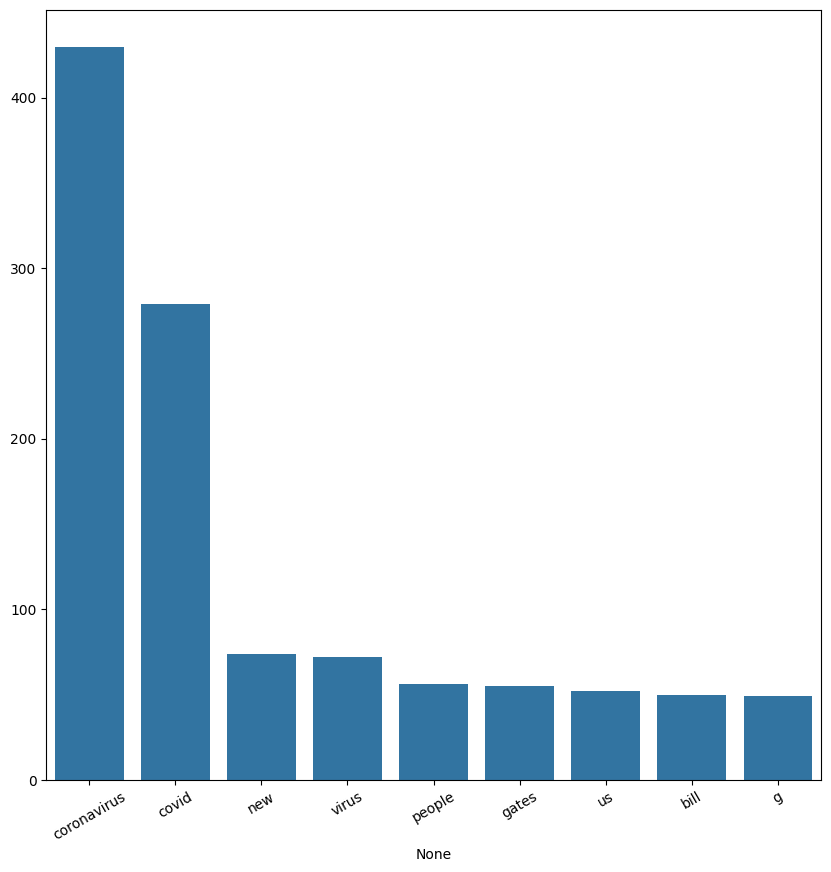

In [52]:
# Plotting the frequency distribution, without punctuation

text_list = txt_string_nopunct.split(" ")

# Getting the frequency distribution list for whole bag of words

freqDist = FreqDist(text_list)

# Printing the 10 most common words

print(freqDist.most_common(10))

# Creating FreqDist, keeping the 10 most common tokens

freqDist = FreqDist(text_list).most_common(10)

# Converting the above to Pandas series via Python Dictionary for easier plotting

freqDist = pd.Series(dict(freqDist))

# Removing the character''

freqDist.pop('')

# Setting figure and ax into variables, for plotting

fig, ax = plt.subplots(figsize=(10,10))

# Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing:

FreqDist_plot = sns.barplot(x=freqDist.index, y=freqDist.values, ax=ax)
plt.xticks(rotation=30);


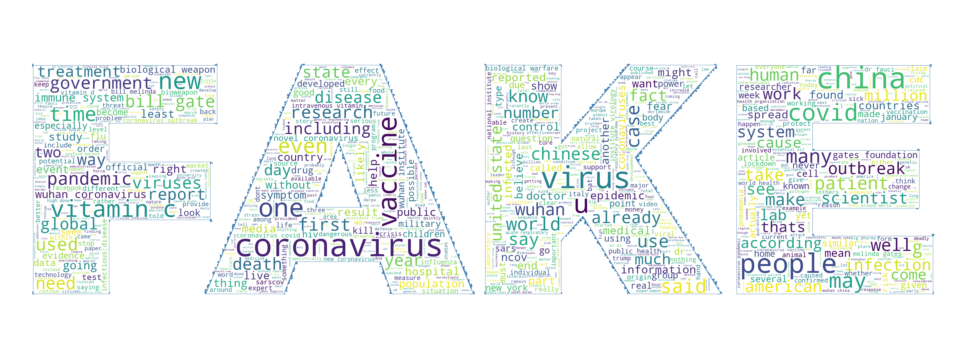

In [58]:
# The last steps of this exploration data analysis phase is to visualize 
# the fake vs the real data in wordcluds

# Creating a words cloud of the fake news first, versus the true news

# Filtering my dataframe only for the FAKE news
FAKE_news = New_df[New_df.label=='FAKE']

# Moving only the FAKE news into a separate dataframe
FAKE_news = pd.DataFrame(FAKE_news, columns = ['label','title_text_source'])
FAKE_news

# First, creating a text list of all the words in column title_text_source 
# and setting these as string
FAKE_news_text = " ".join(review for review in FAKE_news.title_text_source.astype(str))
FAKE_news_text

# Removing punctuation from this FAKE news text:
FAKE_news_text = re.sub(r'[^\w\s]', '', FAKE_news_text)
FAKE_news_text

# Creating my mask
Mask = np.array(Image.open(r"C:\Users\patie\OneDrive\Desktop\UNI STUFF\NLP\Student Number 200546665\fake_news.jpg"))



# Using wordcloud with white background and setting image countour
W_c = WordCloud(background_color='white', mask=Mask, mode='RGB',
                width=1000, max_words=1000, height=1000,
                random_state=1, contour_width=1, contour_color='steelblue')

# Generating and showing this W_c
W_c.generate(FAKE_news_text)
plt.figure(figsize=(10, 10))
plt.imshow(W_c, interpolation='bilinear')
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()


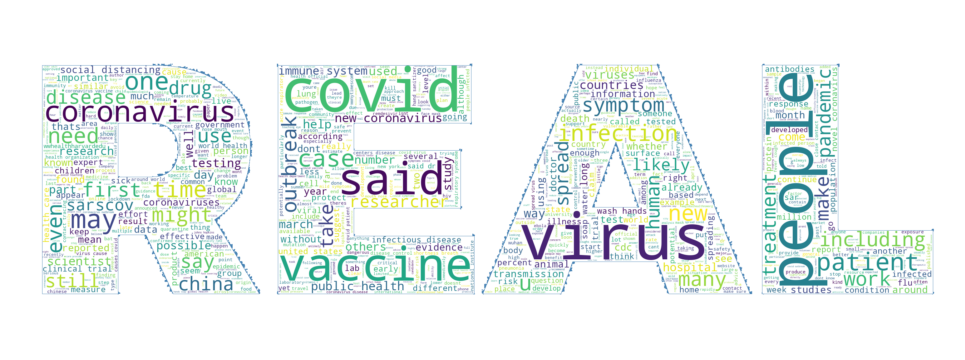

In [59]:
# Now creating a words cloud of the TRUE news

# Filtering my dataframe only for the TRUE news
TRUE_news = New_df[New_df.label=='TRUE']

# Moving only the TRUE news into a separate dataframe
TRUE_news = pd.DataFrame(TRUE_news, columns = ['label','title_text_source'])
TRUE_news

# First, creating a text list of all the words in column title_text_source 
# and setting these as string
TRUE_news_text = " ".join(review for review in TRUE_news.title_text_source.astype(str))
TRUE_news_text

# Removing punctuation from this TRUE news text:
TRUE_news_text = re.sub(r'[^\w\s]', '', TRUE_news_text)
TRUE_news_text

# Creating my mask

Mask = np.array(Image.open(r"C:\Users\patie\OneDrive\Desktop\UNI STUFF\NLP\Student Number 200546665\real_news.jpg"))

# Using wordcloud with white background and setting image countour
W_c = WordCloud(background_color='white', mask=Mask, mode='RGB',
                width=1000, max_words=1000, height=1000,
                random_state=1, contour_width=1, contour_color='steelblue')

# Generating and showing this wc
W_c.generate(TRUE_news_text)
plt.figure(figsize=(10, 10))
plt.imshow(W_c, interpolation='bilinear')
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()




In [60]:
# Last step of pre-processing: transforming the words in the New_df txt 
# column title_text_source, into TF-IDF vectors so I can start applying the classifyiers

tfidf = TfidfVectorizer(lowercase=False, use_idf=True, norm='l2', smooth_idf=True)

X = tfidf.fit_transform(New_df['title_text_source'])

# Choosing our target = the label

y = New_df['label'].values

# Choosing a subset of the data to split in between train and test:

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.3, random_state=11)

X_train, X_test, y_train, y_test

(<Compressed Sparse Row sparse matrix of dtype 'float64'
 	with 172453 stored elements and shape (811, 32214)>,
 <Compressed Sparse Row sparse matrix of dtype 'float64'
 	with 78759 stored elements and shape (348, 32214)>,
 array(['TRUE', 'FAKE', 'FAKE', 'TRUE', 'TRUE', 'TRUE', 'FAKE', 'TRUE',
        'TRUE', 'FAKE', 'TRUE', 'TRUE', 'TRUE', 'FAKE', 'FAKE', 'TRUE',
        'FAKE', 'FAKE', 'TRUE', 'TRUE', 'FAKE', 'TRUE', 'TRUE', 'TRUE',
        'FAKE', 'FAKE', 'TRUE', 'TRUE', 'FAKE', 'FAKE', 'FAKE', 'TRUE',
        'FAKE', 'FAKE', 'TRUE', 'FAKE', 'TRUE', 'TRUE', 'TRUE', 'FAKE',
        'FAKE', 'FAKE', 'TRUE', 'TRUE', 'FAKE', 'FAKE', 'FAKE', 'TRUE',
        'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'TRUE', 'FAKE', 'FAKE',
        'FAKE', 'TRUE', 'TRUE', 'FAKE', 'TRUE', 'TRUE', 'FAKE', 'TRUE',
        'FAKE', 'FAKE', 'TRUE', 'TRUE', 'FAKE', 'TRUE', 'TRUE', 'FAKE',
        'TRUE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'TRUE', 'TRUE',
        'FAKE', 'FAKE', 'TRUE', 'FAKE', 'FAKE', 'FAKE', '

### 6. Baseline performance

The chosen approach to evaluate this project will be to perform a binary classification task (real vs fake) with a Multinomial Naïve Bayes machine learning algorithm. The project dataset will be then benchmarked with four machine learning baselines.

The baselines against which I am going to compare the performance of my chosen approach will be: Decision Tree, Logistic Regression machine learning models, referenced in the already published baseline from (Patwa et al., 2020); a Passive - Aggressive Classifier work of (Meel, 2020) and a basic K-Nearest Neighbour algorithm I have implemented myself from scratch.

The Decision Tree Classifier has been chosen as a baseline because it is a powerful algorithm that can’t be affected by outliers; it can be used in any type of classification task and requires very little data preparation. A decision tree classifier is a tree-structured classifier, where internal nodes represent the features of a dataset, while the branches represent the decision rules and each leaf node represents the outcome.
In this project we are performing the task of binary classification, using the DecisionTreeClassifier() from the sklearn.tree library. Entropy is the criteria used in the classifier and it measures the impurity in a given attribute by specifying randomness in the data. 
The model is first applied to the training data and predicted on the test data. The results are then evaluated and finally nested cross-validation is applied.

The second baseline is the logistic regression which is a simple classification algorithm and one of the most efficient machine learning classifiers for binary classification problems. 
The target of this algorithm (or the dependent variable) has only two possible classes, having data coded as either 1 or 0 (so it is already binary): this feature makes the Logistic regression classifier a very good machine learning algorithm for our binary classification task.
Mathematically, a logistic regression model predicts P(Y=1) as a function of X; it is easier to implement and very efficient to train, however it is quite sensible to outliers.
In this project, we are using the LogisticRegression() method from the sklearn.linear_model library.
Again, the model is first applied to the training data and predicted on the test data. The results are then evaluated and, finally, nested cross-validation is applied.

The third baseline against which I am going to compare the performance of the chosen approach, is the PassiveAggressiveClassifier() method which is a fairly new classifier as is an online-learning algorithm: it is usually used when there is an enormous amount of data as input, from a live source (like a social media website).
This algorithm is chosen because it is very good to detect fake news on a social media website like Twitter, where new data is being added every second.
The system is trained incrementally by feeding it instances sequentially, in small groups called mini-batches. The algorithm is defined passive because when the prediction is correct, it keeps the model and does not make any changes; however, it is aggressive because when the prediction is incorrect, it makes aggressive changes to the model. 
Python’s scikit-learn library implementation of Passive-Aggressive classifier is the PassiveAggressiveClassifier() method, from the sklearn.linear_model library.
Again, the model is first applied to the training data and predicted on the test data. The results are then evaluated and, finally, nested cross-validation is applied.

Finally, the fourth and last baseline is a basic K-Nearest Neighbour algorithm I have implemented myself from scratch, following (Engineer, 2019) video. 
The algorithm KNN_Classifier creates a K-Nearest neighbour model (as outlined in the code below).
A KNN algorithm essentially forms a majority vote between the K most similar instances to a given “unseen” observation. The similarity is defined according to a distance metric between two data points (in this case the Euclidean distance). The entire training dataset is stored and when a prediction is required, the k-most similar records to a new record from the training dataset are located. Once these neighbours are discovered, the summary prediction can be made by returning the most common outcome.
The function I have implemented, first computes the Euclidean distance function between 2 points x1 and x2 and stores it. Then it implements the KNN classifier by first storing k (or the neighbours) and also by storing the training dataset and labels.
The function then predicts the label for each new samples in our test dataset, converting the outcome into a numpy array. Everything is then put together with def _predict(self,x), where one sample x in the dataset will be chosen, the Euclidean distance calculated and the nearest neighbours selected and the labels of the nearest neighbours chosen as well.
The model is first applied to the training data and predicted on the test data. The results are then evaluated (in this instance, no nested cross-validation is applied as the results do not require it).



In [61]:
# Baseline performance 1: Decision Tree classifier

dt = DecisionTreeClassifier(criterion='entropy')

# Applying the model to the training data:

dt.fit(X_train,y_train)

# Predict the test model:

labels_dt = dt.predict(X_test)
labels_dt

array(['FAKE', 'FAKE', 'FAKE', 'FAKE', 'TRUE', 'TRUE', 'TRUE', 'TRUE',
       'FAKE', 'TRUE', 'FAKE', 'FAKE', 'FAKE', 'TRUE', 'FAKE', 'TRUE',
       'TRUE', 'TRUE', 'FAKE', 'TRUE', 'FAKE', 'FAKE', 'FAKE', 'TRUE',
       'FAKE', 'FAKE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'FAKE',
       'TRUE', 'TRUE', 'FAKE', 'TRUE', 'FAKE', 'TRUE', 'TRUE', 'FAKE',
       'TRUE', 'FAKE', 'TRUE', 'FAKE', 'FAKE', 'TRUE', 'FAKE', 'TRUE',
       'FAKE', 'FAKE', 'TRUE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE',
       'FAKE', 'TRUE', 'FAKE', 'TRUE', 'FAKE', 'FAKE', 'FAKE', 'FAKE',
       'FAKE', 'FAKE', 'TRUE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE',
       'TRUE', 'TRUE', 'TRUE', 'FAKE', 'FAKE', 'TRUE', 'TRUE', 'FAKE',
       'TRUE', 'TRUE', 'FAKE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'FAKE',
       'FAKE', 'TRUE', 'TRUE', 'TRUE', 'FAKE', 'FAKE', 'TRUE', 'FAKE',
       'FAKE', 'TRUE', 'TRUE', 'FAKE', 'TRUE', 'FAKE', 'TRUE', 'TRUE',
       'FAKE', 'FAKE', 'FAKE', 'TRUE', 'FAKE', 'FAKE', 'FAKE', 'TRUE',
      

Decision Tree Test Accuracy: 0.8477011494252874
Decision Tree Train Accuracy: 1.0
              precision    recall  f1-score   support

        FAKE       0.80      0.91      0.85       166
        TRUE       0.91      0.79      0.84       182

    accuracy                           0.85       348
   macro avg       0.85      0.85      0.85       348
weighted avg       0.85      0.85      0.85       348

              precision    recall  f1-score   support

        FAKE       1.00      1.00      1.00       409
        TRUE       1.00      1.00      1.00       402

    accuracy                           1.00       811
   macro avg       1.00      1.00      1.00       811
weighted avg       1.00      1.00      1.00       811



Text(113.9222222222222, 0.5, 'True Label')

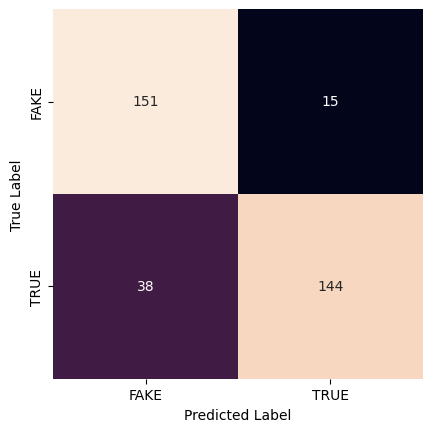

In [62]:
# Let's evalueate the results with accuracy:

print('Decision Tree Test Accuracy:', accuracy_score(y_test, labels_dt))
print('Decision Tree Train Accuracy:', accuracy_score(y_train, dt.predict(X_train)))

# Recall - but also precision, f1-score and support:

print(classification_report(y_test, labels_dt))
print(classification_report(y_train, dt.predict(X_train)))

# Confusion matrix:

mat_dt = confusion_matrix(y_test,labels_dt)
sns.heatmap(mat_dt, square=True, annot=True, fmt="d", cbar=False,
           xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')



In [63]:
# Applyingin nested cross-validation check:
dt = DecisionTreeClassifier(criterion='entropy')

# 10-fold cross-validation: we are passing the entirety of X and y, 
# the function takes care of splitting the data
# Scores = accuracy
scores = cross_val_score(dt, X, y, cv=10, scoring='accuracy')
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))


[0.62068966 0.80172414 0.60344828 0.82758621 0.71551724 0.88793103
 0.85344828 0.77586207 0.70689655 0.7826087 ]
0.76 accuracy with a standard deviation of 0.09


In [64]:
# Baseline performance 2: Logistic regression classifier

lr = LogisticRegression()

# Applying the model to the training data:

lr.fit(X_train,y_train)


# Predict the test model:
labels_lr = lr.predict(X_test)
labels_lr

array(['FAKE', 'TRUE', 'FAKE', 'FAKE', 'TRUE', 'TRUE', 'TRUE', 'FAKE',
       'FAKE', 'TRUE', 'FAKE', 'FAKE', 'FAKE', 'TRUE', 'FAKE', 'TRUE',
       'TRUE', 'TRUE', 'FAKE', 'TRUE', 'FAKE', 'FAKE', 'FAKE', 'TRUE',
       'TRUE', 'FAKE', 'TRUE', 'TRUE', 'FAKE', 'TRUE', 'TRUE', 'FAKE',
       'TRUE', 'TRUE', 'FAKE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'FAKE',
       'TRUE', 'FAKE', 'TRUE', 'FAKE', 'FAKE', 'TRUE', 'FAKE', 'TRUE',
       'FAKE', 'FAKE', 'TRUE', 'TRUE', 'FAKE', 'FAKE', 'TRUE', 'TRUE',
       'TRUE', 'TRUE', 'FAKE', 'TRUE', 'FAKE', 'FAKE', 'TRUE', 'FAKE',
       'FAKE', 'TRUE', 'TRUE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'TRUE',
       'TRUE', 'TRUE', 'TRUE', 'FAKE', 'FAKE', 'TRUE', 'FAKE', 'FAKE',
       'TRUE', 'TRUE', 'TRUE', 'FAKE', 'TRUE', 'TRUE', 'TRUE', 'FAKE',
       'FAKE', 'TRUE', 'FAKE', 'TRUE', 'FAKE', 'FAKE', 'TRUE', 'FAKE',
       'FAKE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'FAKE', 'TRUE', 'FAKE',
       'FAKE', 'FAKE', 'FAKE', 'TRUE', 'FAKE', 'FAKE', 'FAKE', 'TRUE',
      

Logistic Regression Test Accuracy: 0.9310344827586207
Logistic Regression Train Accuracy: 0.9827373612823674
              precision    recall  f1-score   support

        FAKE       0.92      0.94      0.93       166
        TRUE       0.94      0.92      0.93       182

    accuracy                           0.93       348
   macro avg       0.93      0.93      0.93       348
weighted avg       0.93      0.93      0.93       348

              precision    recall  f1-score   support

        FAKE       0.98      0.99      0.98       409
        TRUE       0.99      0.98      0.98       402

    accuracy                           0.98       811
   macro avg       0.98      0.98      0.98       811
weighted avg       0.98      0.98      0.98       811



Text(113.9222222222222, 0.5, 'True Label')

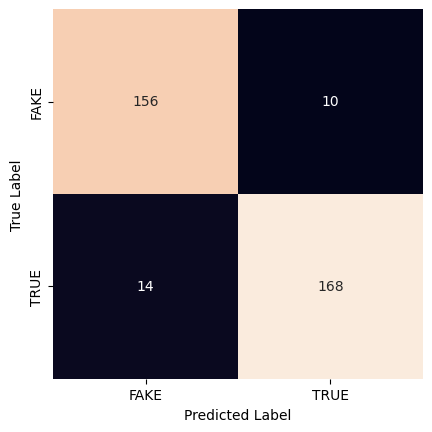

In [65]:
# Let's evaluate the results with accuracy:

print('Logistic Regression Test Accuracy:', accuracy_score(y_test, labels_lr))
print('Logistic Regression Train Accuracy:', accuracy_score(y_train, lr.predict(X_train)))

# Recall - but also precision, f1-score and support:

print(classification_report(y_test, labels_lr))
print(classification_report(y_train, lr.predict(X_train)))

# Confusion matrix:

mat_lr = confusion_matrix(y_test,labels_lr)
sns.heatmap(mat_lr, square=True, annot=True, fmt="d", cbar=False,
           xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')


In [66]:
# Applying nested cross-validation check:
scores = cross_val_score(lr, X, y, cv=10, scoring='accuracy')
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.84482759 0.8362069  0.87068966 0.92241379 0.90517241 0.87931034
 0.94827586 0.95689655 0.97413793 0.93043478]
0.91 accuracy with a standard deviation of 0.05


In [67]:
# Baseline performance 3: Passive aggressive classifier

pac = PassiveAggressiveClassifier()

# Applying the model to the training data:

pac.fit(X_train,y_train)

# Predicting on the test set:
labels_pac = pac.predict(X_test)
labels_pac




array(['FAKE', 'TRUE', 'FAKE', 'FAKE', 'TRUE', 'TRUE', 'TRUE', 'FAKE',
       'FAKE', 'TRUE', 'FAKE', 'FAKE', 'FAKE', 'TRUE', 'FAKE', 'TRUE',
       'TRUE', 'TRUE', 'FAKE', 'TRUE', 'FAKE', 'FAKE', 'TRUE', 'TRUE',
       'FAKE', 'FAKE', 'TRUE', 'TRUE', 'FAKE', 'TRUE', 'TRUE', 'FAKE',
       'TRUE', 'TRUE', 'FAKE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'FAKE',
       'FAKE', 'FAKE', 'TRUE', 'FAKE', 'FAKE', 'TRUE', 'TRUE', 'TRUE',
       'FAKE', 'FAKE', 'TRUE', 'TRUE', 'FAKE', 'FAKE', 'TRUE', 'TRUE',
       'TRUE', 'TRUE', 'TRUE', 'TRUE', 'FAKE', 'FAKE', 'TRUE', 'FAKE',
       'FAKE', 'TRUE', 'TRUE', 'FAKE', 'FAKE', 'FAKE', 'TRUE', 'FAKE',
       'TRUE', 'TRUE', 'TRUE', 'FAKE', 'FAKE', 'TRUE', 'FAKE', 'FAKE',
       'TRUE', 'TRUE', 'TRUE', 'FAKE', 'TRUE', 'TRUE', 'TRUE', 'FAKE',
       'FAKE', 'TRUE', 'FAKE', 'TRUE', 'FAKE', 'FAKE', 'TRUE', 'FAKE',
       'FAKE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'FAKE', 'TRUE', 'FAKE',
       'FAKE', 'FAKE', 'FAKE', 'TRUE', 'FAKE', 'FAKE', 'FAKE', 'TRUE',
      

Passive Agressive Test Accuracy: 0.9482758620689655
Passive Agressive Train Accuracy: 1.0
              precision    recall  f1-score   support

        FAKE       0.95      0.95      0.95       166
        TRUE       0.95      0.95      0.95       182

    accuracy                           0.95       348
   macro avg       0.95      0.95      0.95       348
weighted avg       0.95      0.95      0.95       348

              precision    recall  f1-score   support

        FAKE       1.00      1.00      1.00       409
        TRUE       1.00      1.00      1.00       402

    accuracy                           1.00       811
   macro avg       1.00      1.00      1.00       811
weighted avg       1.00      1.00      1.00       811



Text(113.9222222222222, 0.5, 'True Label')

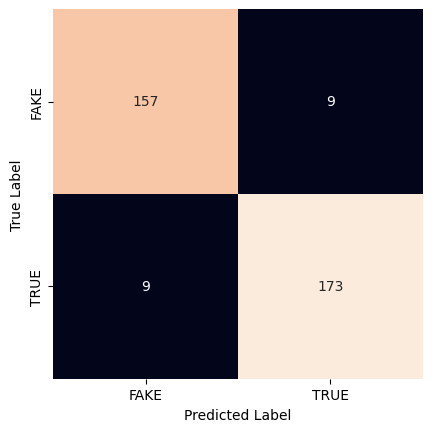

In [68]:
# Let's evaluate the results with accuracy:

print('Passive Agressive Test Accuracy:', accuracy_score(y_test, labels_pac))
print('Passive Agressive Train Accuracy:', accuracy_score(y_train, pac.predict(X_train)))

# Recall - but also precision, f1-score and support:

print(classification_report(y_test, labels_pac))
print(classification_report(y_train, pac.predict(X_train)))

# Confusion matrix:

mat_pac = confusion_matrix(y_test,labels_pac)
sns.heatmap(mat_pac, square=True, annot=True, fmt="d", cbar=False,
           xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')

In [69]:
# Applyingin nested cross-validation check:
scores = cross_val_score(pac, X, y, cv=10, scoring='accuracy')
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.89655172 0.84482759 0.87931034 0.92241379 0.9137931  0.9137931
 0.98275862 0.97413793 0.97413793 0.94782609]
0.92 accuracy with a standard deviation of 0.04


In [70]:
# Baseline performance 4: creating my own Knn

# Choosing a subset of the data to split in between train and test:

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.3, random_state=11)

X_train, X_test, y_train, y_test

def Euclidean_distance(x1, x2):
    '''Computes the Euclidean distance between 2 points x1 and x2'''
    return np.sqrt(np.sum(x1-x2)**2)

class KNN_Classifier:
    '''Calculates a KNN model at a given k'''
    def __init__(self, k):
        '''Stores k, which will be used later on'''
        self.k = k
    def fit(self, X, y):
        '''Stores the training datasets and training labels which will be used later'''
        self.X_train = X
        self.y_train = y
    def predict(self, X):
        '''Predicts the label for each new samples in our test dataset; it also converts the outcome into a numpy array.'''
        predicted_labels = [self._predict(x) for x in X]
        return np.array(predicted_labels)
    
    def _predict(self,x):
        '''It will get one sample x in the dataset and calculate all distances; it looks at the nearest neighbours and the labels of the nearest neighbours
        and chose the most common label'''
        # Computing Euclidean distances for each item in the train dataset:
        distances = [Euclidean_distance(x, x_train) for x_train in self.X_train]
        # Get k nearest Neighbour sample and get the labels as well:
        k_indices = np.argsort(distances)[:self.k]            # We sort the distances and get the indices of the k nearest sample.
        k_nearest_labels = [self.y_train[i] for i in k_indices]    # Returns the indices of how it was sorted with the labels.
        # Get the most common label:
        most_common = max(set(k_nearest_labels), key=k_nearest_labels.count)
        return most_common
    
Knn = KNN_Classifier(k=2)
Knn.fit(X_train, y_train)
labels_knn = Knn.predict(X_test)
labels_knn



array(['FAKE', 'TRUE', 'FAKE', 'TRUE', 'FAKE', 'FAKE', 'FAKE', 'FAKE',
       'FAKE', 'FAKE', 'FAKE', 'TRUE', 'FAKE', 'FAKE', 'FAKE', 'TRUE',
       'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE',
       'TRUE', 'TRUE', 'FAKE', 'TRUE', 'FAKE', 'TRUE', 'FAKE', 'FAKE',
       'FAKE', 'FAKE', 'FAKE', 'TRUE', 'FAKE', 'FAKE', 'TRUE', 'TRUE',
       'FAKE', 'FAKE', 'TRUE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE',
       'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE',
       'FAKE', 'FAKE', 'TRUE', 'FAKE', 'FAKE', 'TRUE', 'FAKE', 'TRUE',
       'FAKE', 'TRUE', 'FAKE', 'FAKE', 'FAKE', 'TRUE', 'FAKE', 'FAKE',
       'FAKE', 'FAKE', 'FAKE', 'FAKE', 'TRUE', 'TRUE', 'TRUE', 'FAKE',
       'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'TRUE', 'FAKE', 'FAKE',
       'FAKE', 'TRUE', 'TRUE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE',
       'FAKE', 'FAKE', 'TRUE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE',
       'FAKE', 'FAKE', 'FAKE', 'FAKE', 'TRUE', 'FAKE', 'FAKE', 'FAKE',
      

K-Nearest Neighbour Test Accuracy: 0.5344827586206896
K-Nearest Neigh Train Accuracy: 0.752157829839704
              precision    recall  f1-score   support

        FAKE       0.51      0.81      0.62       166
        TRUE       0.62      0.29      0.39       182

    accuracy                           0.53       348
   macro avg       0.56      0.55      0.51       348
weighted avg       0.57      0.53      0.50       348

              precision    recall  f1-score   support

        FAKE       0.67      1.00      0.80       409
        TRUE       1.00      0.50      0.67       402

    accuracy                           0.75       811
   macro avg       0.84      0.75      0.73       811
weighted avg       0.83      0.75      0.74       811



Text(113.9222222222222, 0.5, 'True Label')

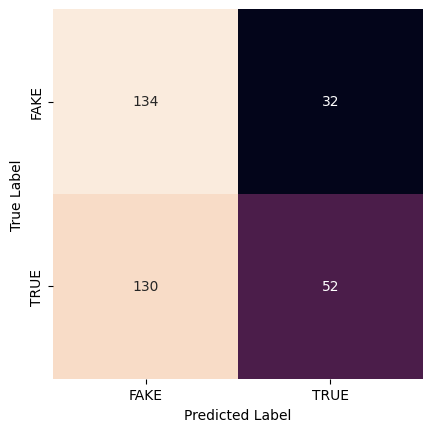

In [71]:
# Let's evaluate the results with accuracy:

print('K-Nearest Neighbour Test Accuracy:', accuracy_score(y_test, labels_knn))
print('K-Nearest Neigh Train Accuracy:', accuracy_score(y_train, Knn.predict(X_train)))

# Recall - but also precision, f1-score and support:

print(classification_report(y_test, labels_knn))
print(classification_report(y_train, Knn.predict(X_train)))

# Confusion matrix:

mat_knn = confusion_matrix(y_test,labels_knn)
sns.heatmap(mat_knn, square=True, annot=True, fmt="d", cbar=False,
           xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')


### 7. Classification approach

The chosen approach to evaluate this project will be building a Multinomial Naïve Bayes model to classify the labels. 
As outlined in the pre-processing phase, our TF-IDF vectorised feature text is stored into item X, while our target (or labels) is stored into item y.
Our labels (true, fake) are the outputs of the model that we want to predict, while the feature text is the dataset the models will use to train and test its performance.
The Multinomial Naïve Bayes model has been selected as the chosen approach, because is one of the most popular supervised learning classifications that is used for the analysis of the categorical text data and is the best model to be implemented in this text classification task, due to its ability to generate features (or words) from a multinomial distribution and getting the probability of observing counts (even across various categories if present).
The algorithm used in the Multinomial Naïve Bayes model is based on the Bayes theorem and predicts the tag of a text by calculating the probability of each tag for a given sample and then retrieving the tag with the highest probability as the output. Briefly, the Bayes theorem estimates the likelihood of occurrence based on prior knowledge of the event's conditions.
It calculates the probability of an event occurring based on the prior knowledge of conditions related to an event and is based on the following formula:
P(A|B) = P(A) * P(B|A)/P(B)
Where we are calculating the probability of class A when predictor B is already provided.
P(B) = prior probability of B
P(A) = prior probability of class A
P(B|A) = occurrence of predictor B given class A probability
This formula helps in calculating the probability of the tags in the text and it is used in the Multinomial Naïve Bayes model.
The Naive assumption in the Multinomial Naive Bayes theorem is about the correlation between the words (or features) in the document: it is assumed that every word in a sentence is independent of the other ones, which is true in text classification problems. This means that we are not looking at entire sentences, but rather at individual words. If the events are independent (or mutually exclusive), the joint probability is equal to their individual probabilities, probability of words (events) occurring together in a sentence is their individual probability.
Sklearn provides an easy-to-implement object called MultinomialNB() which I run by first fitting it to the training data and then predicting on the test data.
The results are evaluated with accuracy and recall on both train and test dataset, with a confusion matrix and with a nested cross-validation approach.


In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.3, random_state=11)

X_train, X_test, y_train, y_test

# Calling the multinomial naive Bayes model:

model = MultinomialNB()

# Applying the model to the training data:

model.fit(X_train, y_train)

# Predict the test model:
labels = model.predict(X_test)
labels


array(['FAKE', 'TRUE', 'FAKE', 'FAKE', 'TRUE', 'FAKE', 'TRUE', 'FAKE',
       'FAKE', 'TRUE', 'FAKE', 'FAKE', 'FAKE', 'TRUE', 'FAKE', 'TRUE',
       'TRUE', 'TRUE', 'FAKE', 'TRUE', 'FAKE', 'FAKE', 'TRUE', 'TRUE',
       'FAKE', 'FAKE', 'TRUE', 'TRUE', 'FAKE', 'TRUE', 'TRUE', 'FAKE',
       'TRUE', 'TRUE', 'FAKE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'FAKE',
       'FAKE', 'FAKE', 'TRUE', 'FAKE', 'FAKE', 'TRUE', 'FAKE', 'TRUE',
       'FAKE', 'FAKE', 'TRUE', 'TRUE', 'FAKE', 'FAKE', 'TRUE', 'TRUE',
       'TRUE', 'TRUE', 'TRUE', 'TRUE', 'FAKE', 'FAKE', 'TRUE', 'FAKE',
       'FAKE', 'TRUE', 'TRUE', 'FAKE', 'FAKE', 'FAKE', 'TRUE', 'TRUE',
       'TRUE', 'TRUE', 'TRUE', 'FAKE', 'FAKE', 'TRUE', 'FAKE', 'FAKE',
       'TRUE', 'TRUE', 'TRUE', 'FAKE', 'TRUE', 'TRUE', 'TRUE', 'FAKE',
       'FAKE', 'TRUE', 'FAKE', 'TRUE', 'FAKE', 'FAKE', 'TRUE', 'FAKE',
       'FAKE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'FAKE', 'TRUE', 'FAKE',
       'FAKE', 'FAKE', 'FAKE', 'TRUE', 'FAKE', 'FAKE', 'FAKE', 'TRUE',
      

Multinomial NB Test Accuracy: 0.9310344827586207
Multinomial NB Train Accuracy: 0.967940813810111
              precision    recall  f1-score   support

        FAKE       0.91      0.95      0.93       166
        TRUE       0.95      0.92      0.93       182

    accuracy                           0.93       348
   macro avg       0.93      0.93      0.93       348
weighted avg       0.93      0.93      0.93       348

              precision    recall  f1-score   support

        FAKE       0.96      0.97      0.97       409
        TRUE       0.97      0.96      0.97       402

    accuracy                           0.97       811
   macro avg       0.97      0.97      0.97       811
weighted avg       0.97      0.97      0.97       811



Text(113.9222222222222, 0.5, 'True Label')

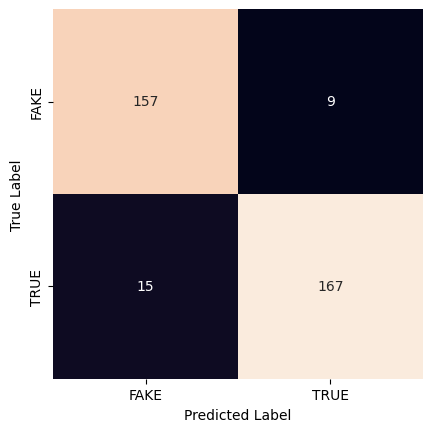

In [73]:
# Let's evaluate the results with accuracy first, and then recall and
# finally with a confusion matrix.

# Accurancy:

print ('Multinomial NB Test Accuracy:', accuracy_score(y_test, labels))
print ('Multinomial NB Train Accuracy:', accuracy_score(y_train, model.predict(X_train)))

# Recall - but also precision, f1-score and support:

print(classification_report(y_test, labels))
print(classification_report(y_train, model.predict(X_train)))

# Visualizing the performance using a confusion matrix:

mat = confusion_matrix(y_test,labels)
sns.heatmap(mat, square=True, annot=True, fmt="d", cbar=False,
           xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')

In [74]:
# Applyingin nested cross-validation check on our Multinomial model:
model = MultinomialNB()

# 10-fold cross-validation: we are passing the entirety of X and y, 
# the function takes care of splitting the data
# Scores = accuracy
scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')
print(scores)

print("%0.2f Accuracy, with a standard deviation of %0.2f" % (scores.mean(), scores.std()))



[0.79310345 0.79310345 0.80172414 0.9137931  0.93103448 0.86206897
 0.95689655 0.9137931  0.94827586 0.93913043]
0.89 Accuracy, with a standard deviation of 0.06


## III Conclusions
### 8. Evaluation

The results of the Multinomial Naïve Bayes classifier show accuracy on the Test and on the Train dataset at 0.94 for the first and 0.96 for the latter.
Recall on the test dataset is 0.94 for FAKE and 0.93 for TRUE: which as we recall, it means that out of all the articles that are FAKE/TRUE, these many articles were correctly identified.
On the other hand, recall on the train dataset is 0.96 for both labels.
The confusion matrix is self-explanatory and shows the following results:
TP = True Positives = 170
TN = True Negatives = 156
FP = False Positives = 10
FN = False Negatives = 12
Lastly, the nested cross-validation check on our Multinomial model shows that the accuracy is 
0.90, with a standard deviation of 0.05.

The baselines result’s together with the Multinomial Naïve Bayes approach are summarized in the table below:



|                                  | Multinomial Naïve Bayes Classifier | Decision Tree Classifier | Logistic Regression Classifier | Passive - Aggressive Classifier  | K-Nearest Neighbour Classifier |
|----------------------------------|------------------------------------|--------------------------|--------------------------------|----------------------------------|--------------------------------|
| Test Accuracy                    |  0.94                              |  0.87                    | 0.94                           | 0.95                             | 0.53                           |
| Train Accuracy                   | 0.96                               | 1.00                     | 0.98                           | 1.00                             | 0.79                           |
| Test Recall                      | 0.94 FAKE / 0.93 TRUE              |0.89 FAKE / 0.86 TRUE    | 0.95 FAKE / 0.93 TRUE          | 0.93 FAKE / 0.96 TRUE            | 0.76 FAKE / 0.32 TRUE          |
| Train Recall                     | 0.96 FAKE / 0.96 TRUE              |1.00 FAKE / 1.00 TRUE    | 0.99 FAKE / 0.97 TRUE          | 1.00 FAKE / 1.00 TRUE            | 1.00 FAKE / 0.58 TRUE          |
| Nested cross-validation accuracy | 0.90 / SD 0.05                      | 0.83 / SD 0.04            | 0.91 / SD 0.05                  | 0.93 / SD 0.04                    | /                              |


As we can see, the multinomial naïve bayes classifier performs pretty well compared to the other models; the test accuracy performs as well as the logistic regression classifier with a score of 0.94.
While the train accuracy also performs well, it is however surpassed by the Decision Tree and the Passive Aggressive Classifier with a perfect score of 1.00 for both.
While the recall results on the train dataset for our Multinomial Naïve Bayes model score a pretty good 0.96, these receive, again, a perfect score of 1.00 for both Fake and True for Decision Tree and Passive Aggressive Classifier.
The nested cross-validation accuracy with the standard deviations performs well and aligns with the calculated model accuracies.
Finally, the classifier performing the worst is the K-Nearest Neighbour Classifier with a train Accuracy of only 0.79 and while the Train Recall on Fake label scores a good 1, the True label scores only 0.58.


The confusion matrices are summarized below:

|                                 | True Positives | True Negatives  | False Positives  | False Negatives  |   |
|---------------------------------|----------------|-----------------|------------------|------------------|---|
| Multinomial Naïve Bayes         | 170            | 156             | 10               | 12               |   |
| Decision Tree Classifier        | 159            | 148             | 18               | 23               |   |
| Logistic Regression Classifier  | 170            | 158             | 8                | 12               |   |
| Passive - Aggressive Classifier | 174            | 160             | 6                | 8                |   |
| K-Nearest Neighbour Classifier  | 59             | 126             | 40               | 123              |   |





### 9. Summary and conclusions

In this project, I describe a 1164 rows length, real versus fake news detection dataset containing articles and news related to COVID-19. The data is balanced and is used to develop binary classification algorithms for the detection of fake or real news.
The Multinomial Naïve Bayes model approach achieves very impressive results with 94% of accuracy on the test dataset, and a 96% recall for both labels.
I also benchmark the dataset using other machine learning algorithms and project them as the potential baselines. Among these machine learning models, the Passive-Aggressive classifier performs the best with 100% accuracy on the test dataset and perfect recall on the train dataset of 100% and with only 6 False Positives and 8 False Negatives in the confusion matrix.
I can securely say that the chosen approach is a fairly good classifier which can successfully help us to detect if an article provides true or fake information on Covid-19, making the objectives of this project fully achieved.
Both models can be easily transferred to any binary classification task where the text data needs to be trained to select the correct label. It is fairly easily replicable on a different dataset, where the pre-processing can be tailored made to ensure the text is as cleaned as possible.
The approach can be replicated by others also using deep learning instead of machine learning to implement the algorithm. 
Future work could be targeted towards collecting more data to make the dataset larger or collecting multilingual data to assess if any changes to the languages results in better or worst performance.

Alternative approaches could be using Support Vector machines or Naïve Bayes models as classifiers instead. Potential benefits are that both models can be used with multiple class prediction problems. For Naïve Bayes, when the assumption of independent predictors holds true, it can perform better than other models and requires a small amount of training data to estimate the test data. Drawbacks of this alternative approach could be that the model is naïve, which means that the assumption of independent predictors is almost impossible to have in real life
The Support Vector Machines algorithm, on the other hand, works relatively well when there is a clear margin of separation between classes and is very effective in high dimensional spaces.
However, this algorithm is not suitable for large data sets and it does not perform very well when the data set has more noise or for example when the target classes are overlapping.



## REFERENCES:

- Engineer, P. (2019). KNN (K Nearest Neighbors) in Python - Machine Learning From Scratch 01 - Python Tutorial. YouTube. Available at: https://www.youtube.com/watch?v=ngLyX54e1LU [Accessed 25 Dec. 2021].


- Patwa, P., Sharma, S., Pykl, S., Guptha, V., Kumari, G., Akhtar, S., Ekbal, A., Das, A. and Chakraborty, T. (n.d.). Fighting an Infodemic: COVID-19 Fake News Dataset. [online] Available at: https://arxiv.org/ftp/arxiv/papers/2011/2011.03327.pdf.


- Kesarwani, A., Chauhan, S.S. and Nair, A.R. (2020). Fake News Detection on Social Media using K-Nearest Neighbor Classifier. 2020 International Conference on Advances in Computing and Communication Engineering (ICACCE). [online] Available at: https://ieeexplore.ieee.org/document/9154997 [Accessed 25 Dec. 2021].


- Gupta, S. and P. Meel (2020). Fake News Detection Using Passive-Aggressive Classifier. [online] undefined. Available at: https://www.semanticscholar.org/paper/Fake-News-Detection-Using-Passive-Aggressive-Gupta-Meel/049c8d59bc393d90d6df5ede580c872b6bc180d3 [Accessed 25 Dec. 2021].


- Muhammad Ardi (2020). COVID-19 Fake News Detection using Naïve Bayes Classifier. [online] Medium. Available at: https://becominghuman.ai/covid-19-fake-news-detection-using-na%C3%AFve-bayes-classifier-40193e7f9273 [Accessed 26 Dec. 2021].


- Githubusercontent.com. (2020). [online] Available at: https://raw.githubusercontent.com/susanli2016/NLP-with-Python/master/data/corona_fake.csv [Accessed 29 Nov. 2021].

